<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/01-proceso-analisis-exploratorio/01___Proceso_analisis_exploratorio__sin_resolver_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Proceso Análisis Exploratorio 
Introducción al EDA (Exploratory Data Analysis).

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1IT6OVy9YS_sbgHF2oU9D0L--fZiyUfij7NxVhu3cAdg/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/01-proceso-analisis-exploratorio/01___Proceso_analisis_exploratorio__sin_resolver_ejercicios.ipynb)
*   [Enlace a este notebook resuelto](https://colab.research.google.com/drive/1B37GMOCjKQ0S8NoRI6lALEW9EZtE0Hit#scrollTo=R53FGLN8jo1L)




# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 02 Load Data
El primer paso para analizar datos es, claro, importarlos. Esto no es siempre trivial, especialmente trabajando con Colab ya que nuestro notebook está en la nube de Google y hay que conseguir hacer llegar los datos allí también. 

Vamos a ver [varias formas de importar](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) datos en Colab.


*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

## 0201 Importar una tabla desde GitHub

Es posible importar una tabla que guardemos en GitHub ([¿No sabes lo que es GitHub?](https://guides.github.com/activities/hello-world/)). GitHub es un repositorio de código, más que un lugar donde guardar datos habitualmente. De todas formas, podemos importar una tabla (pequeña) desde gitHub así:

1.   Las tablas deben ser pequeñas, pues GitHub no permite archivos mayores de 100MB 
2.   Localiza la tabla en un repositorio tuyo o público
3.   Pulsa en la opción RAW y copia el link de la dirección resultante
4.   Importa los datos utilizando pd.read_csv(link_raw)



### 020101 EJEMPLO 1: Covid-19
La universidad Johns Hopkins (USA) viene recopilando datos de la mayor fiabilidad posible sobre los casos y muertes confirmados por covid-19 mundialmente. Los datos son públicos y se actualizan diariamente en [su repositorio de GitHub](https://github.com/CSSEGISandData/COVID-19).

Dentro de este repositorio, hay diversos datasets, fuentes, código. Pongamos que nos interesa el dataset de casos confirmados a nivel mundial. 

¿Cómo podemos cargalo en este notebook en un Dataframe llamado df_covid?

In [ ]:
# url de archivo raw de casos confirmados
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# carga el archivo en un dataframe df_covid
df_covid = pd.read_csv(url)

df_covid.head()

## 0202 Importar una tabla local

Es posible importar una tabla que guardemos en nuestro local (en nuestro PC). 

1.   Primero tendremos que subir el archivo de nuestro local a la nube de Google 
2.   Luego generemos un buffer de los datos
3.   Finalmente los importaremos utilizando pd.read_csv()

### 020201 EJEMPLO 2: SP500
Descargad [ese dataset](https://drive.google.com/file/d/1OfTfaCTGtiS27G-uNpDsRgHqFUIaZ3XP/view?usp=sharing) de mi Google Drive personal a vuestro PC. Recoge la evolución diaria histórica del [SP&500](https://en.wikipedia.org/wiki/S%26P_500_Index). 


Ahora que está en vuestro local, ¿Cómo podríamos cargarlo a este notebook?

In [ ]:
# Generamos un objeto para subir el archivo
from google.colab import files
uploaded = files.upload()

In [ ]:
# Convertimos los bytes a formato tabular
import io
buffer_io = io.BytesIO(uploaded['sp500.csv'])


# Cargamos en un dataframe
df_sp500 = pd.read_csv(buffer_io)
df_sp500.head(3)

## 0203 Importar una tabla de Google Drive

Es posible importar una tabla guardada en Google Drive. Requiere:

1.   Emparejar Colab y Google Drive 
2.   Importarlo utilizando pd.read_csv()

### 020301 EJEMPLO 3: Fifa19
Descargad [este dataset](https://drive.google.com/file/d/1_qzowEIMZsLYL1VbeXb9pzSpMkPSRqWb/view?usp=sharing) con las características de los jugadores del Fifa 19 de mi Google Drive personal a vuestro pc y luego subidlo a vuestro Google Drive. 

¿Cómo podríamos cargarlo desde ahí a este notebook?

In [ ]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/fifa19.csv'
df_fifa19 = pd.read_csv(dir_archivo)
df_fifa19.head()

## 0204 EJERCICIO 1: Importar una tabla de varias formas

[Kaggle](https://www.kaggle.com/) es un sitio web imprescindible si estás aprendiendo ciencia de datos. Hay competiciones de machine learning, cursos, posts... 

Y también es un buen sitio para buscar datos, como haremos en esta ocasión. Yo me he fijado en [este](https://www.kaggle.com/miguelsxvi/air-quality-madrid-2001-2020?select=calidad_aire_madrid.csv), que contiene la evolución diaria de la concentración de diversas partículas contaminantes en Madrid. 

Leed la descripción de la página para familiarizaros con Kaggle y descargad el csv a vuestro pc. Luego, probad a cargarlo en este Notebook utilizando las 3 formas que hemos visto. (Para traerlo desde GitHub podéis utilizar [esta copia del archivo en mi GitHub personal](https://github.com/JotaBlanco/TheValley/blob/main/Data/calidad_aire_madrid.csv)). Comparad la velocidad y sencillez de cada método.

In [ ]:
# DESDE GITHUB

# url de archivo raw


# carga el archivo en un dataframe df_aire


# visualiza la tabla


In [ ]:
# DESDE LOCAL

# Generamos un objeto para subir el archivo

# Convertimos los bytes a formato tabular

# Cargamos en un dataframe df_aire_2

# Lo visualizamos


In [ ]:
# DESDE GOOGLE DRIVE

# Primero emparejamos Colab con Google Drive

# Importamos el archivo usando read_csv() como df_aire_3

# Visualizamos


# 03 Basic checks
Una vez se han importado los datos, empezamos realizando comprobaciones básicas: tamaño de la tabla, columnas presentes, etc.

El método dataframe.[info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) es muy útil para esto.

In [ ]:
df_sp500.info()

## 0301 Vista previa
Una buena primera comprobación suele ser visualizar la tabla. 

Aquí son muy útiles los métodos dataframe.[head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) y dataframe.[tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html).

In [ ]:
df_sp500.head()

In [ ]:
df_sp500.head(2)

In [ ]:
df_sp500.tail()

### iloc[filas,columnas]
Filtra el dataframe para quedarse con datos concretos utilizando indices.

In [ ]:
df_sp500.iloc[1:3]

In [ ]:
df_sp500.iloc[-5:,:5]

### loc[filas,columnas]
Filtra el dataframe para quedarse con datos concretos utilizando valores.

In [ ]:
df_sp500.loc[2:5, ['Date','Open','Close']]

In [ ]:
# Admite filtros!
filtro_posterior_2018 = df_sp500['Date'] > '2018-12-31'
filtro_posterior_2018

In [ ]:
df_sp500.loc[filtro_posterior_2018, ['Date','Open','Close']]

## 0302 Tamaño
El tamaño de las tablas se puede comprobar con dataframe.[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), que devuelve un tupple (filas, columnas).

In [ ]:
df_covid.shape

In [ ]:
# filas
df_covid.shape[0]

In [ ]:
# filas
len(df_covid)

In [ ]:
# columnas
df_covid.shape[1]

In [ ]:
df_sp500.shape

In [ ]:
df_fifa19.shape

In [ ]:
df_aire.shape

## 0303 Tipos de datos
Qué tipos de datos contiene nuestro dataframe?

In [ ]:
df_fifa19.info()

In [ ]:
df_fifa19.head(2)

In [ ]:
type(df_fifa19)

In [ ]:
type(df_fifa19['ID'])

In [ ]:
type(df_fifa19['ID'][0])

In [ ]:
type(df_fifa19['Name'][0])

## 0304 Variables
El método dataframe.[columns](https://www.google.com/search?q=dataframe+columns&oq=dataframe+columns&aqs=chrome..69i57j0l5.5054j0j4&sourceid=chrome&ie=UTF-8) devuelve las columnas de nuestra tabla en orden. Es útil en lugar del método info() cuando tenemos muchas columnas, o para realizar operaciones con ellas. 

In [ ]:
df_fifa19.columns

## 0305 EJEMPLO 4: Comprobaciones básicas
Hagamos las comprobaciones básicas del dataframe sobre la calidad del aire de Madrid:


*   Número de filas y columnas
*   Nombre de las columnas
*   Tipos de dato de cada columna
*   Vista previa de los primeros y últimos valores

In [ ]:
# info()
df_aire.info()

In [ ]:
# Vista previas
display(df_aire.head())
display(df_aire.tail())

# 04 Limpieza de Nulos
Los nulos son habituales y un poco molestos. Constituyen una pérdida de información y pueden impedir ciertos cálculos.

Es importante detectarlos y, cuando sea posible, corregirlos.

## 0401 Nulos por variable
Podemos ver el número de nulos por variable.

Dataframe[.isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) es un método muy útil.

In [ ]:
# Método isna()
df_fifa19.isna().head()

In [ ]:
df_fifa19.isna().sum()

In [ ]:
pd.DataFrame(df_fifa19.isna().sum())

### 040101 EJEMPLO 5: Función buscadora de nulos
vamos a crear una función que, dado un dataframe, muestra una tabla con el número de nulos por variable ordenado de mayor a menor.

In [ ]:
def contador_nulos(df):
  """
  Función que devuelve un dataframe indicando el número de nulos en cada
  variables. 
  """
  df_nulos = pd.DataFrame(df.isna().sum())
  df_nulos.columns = ['# Nulos']
  return df_nulos.sort_values('# Nulos', ascending=False)

In [ ]:
contador_nulos(df_covid)

In [ ]:
contador_nulos(df_sp500)

In [ ]:
df_contador = contador_nulos(df_fifa19)
df_contador.head()

## 0402 Explorar Nulos
Cuando sea posible es recomendable entender la causa de los nulos. Hay algún patrón que se repite entre los nulos?

In [ ]:
# La columna 'Lat' solo tenía un nulo, podemos entender por qué?
filtro_lat_nulo = df_covid['Lat'].isna()
df_covid.loc[filtro_lat_nulo, ['Province/State', 'Country/Region', 'Lat', 'Long']]

### EJEMPLO 6: Entender nulos en 'Province/State'
En esta columna hay muchos nulos: 188. Para entender cuándo están presentes, vamos a qué paises pertenencen y a cuáles no.

In [ ]:
filtro_col_nulos = df_covid['Province/State'].isna()
filtro_col_nulos

In [ ]:
filtro_col_no_nulos = df_covid['Province/State'].isna()==False
filtro_col_no_nulos

In [ ]:
df_covid.loc[filtro_col_nulos, 'Country/Region']

In [ ]:
paises_provincia_nulos = df_covid.loc[filtro_col_nulos, 'Country/Region'].unique()
paises_provincia_nulos

In [ ]:
paises_provincia_no_nulos = df_covid.loc[filtro_col_no_nulos, 'Country/Region'].unique()
paises_provincia_no_nulos

## 0403 Tratamiento de Nulos
Una vez hemos detectado los nulos presentes en la tabla podemos corregirlos de varias formas.

### 040301 Prescindir de Nulos
Si tenemos pocas filas con nulos y consideramos que no son muy decisivas, podemos prescindir de dichas filas con el método dataframe.[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
# Tamaño del dataframe original
df_covid.shape

In [ ]:
# Eliminamos filas con nulos en la columna 'Lat'
df_covid_drop_null_lat = df_covid.dropna(subset=['Lat'])
df_covid_drop_null_lat.shape

#### 04030101 EJEMPLO 7: Eliminar filas
En el dataframe de jugadores del Fifa, si hay ciertas filas con con gran presencia de nulos y éstas no suponen un número significativo para el total, podemos eliminarlas.

In [ ]:
df_fifa19.shape

In [ ]:
# Parece que hay 48 jugadores de los que no tenemos datos. Son poquitos 
# (comparado con el total de 18207) así que podemos prescindir de ellos
df_contador.head(50)

In [ ]:
# Eliminamos aquellas filas que no tienen informado el peso del jugardor
df_fifa19.dropna(axis=0, subset=['Weight'], inplace=True)
df_contador = contador_nulos(df_fifa19)
df_contador.head(50)

In [ ]:
df_fifa19.shape

### 040302 Rellenar Nulos con Valores
Podemos sustituir los nulos con valores concretos: 0, la media o mediana, etc.

Para esto podemos utilizar el método dataframe.[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna).

In [ ]:
df_contador = contador_nulos(df_fifa19)
df_contador.head(50)

In [ ]:
# Nulos en columna 'Club'
df_fifa19['Club'] = df_fifa19['Club'].fillna('Unknown')

In [ ]:
# Nulos en columna 'Jersey Number'
mediana_dorsal = df_fifa19['Jersey Number'].median()
df_fifa19['Jersey Number'] = df_fifa19['Jersey Number'].fillna(mediana_dorsal)

# 05 Limpieza de datos
Es habitual que algunos de los datos se encuentren en formatos no apropiados.


## 0501 Limpieza de Formatos
A veces los datos se encuentran en formatos no adecuados. Un formato correspondiente con el tipo de dato permitirá realizar ciertas operaciones con mayor facilidad.

Para esto nos serán de utilidad los métodos:

*   [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)
*   [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [ ]:
df_sp500.loc[:5,'Date']

In [ ]:
df_sp500.loc[:5,'Date'][0]

In [ ]:
type(df_sp500.loc[:5,'Date'][0])

In [ ]:
# Cambiamos el formato de la columna 'Date'
df_sp500['Date'] = pd.to_datetime(
    df_sp500['Date'], format='%Y-%m-%d', errors='ignore')

## 0502 Eliminación de variables
Se pueden eliminar columnas o filas no necesarias con el método dataframe.[drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [ ]:
df_fifa19.head(3)

In [ ]:
df_fifa19.columns

In [ ]:
cols_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 
                'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 
                'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

df_fifa19_clean = df_fifa19.drop(cols_to_drop, axis=1)

In [ ]:
df_fifa19.shape, df_fifa19_clean.shape

# 06 Transformación de variables
A veces querremos crear nuevas variables o modificar variables existentes de manera un poco más personalizada/compleja que lo visto hasta ahora. Cómo lo hacemos?

Para cambiar los valores en una columna debemos tratar de evitar iterar sobre las filas del dataframe. Son procesos lentos que llevarán mucho tiempo para dataframes grandes. El orden (atendiendo a la eficiencia computacional) en que debemos intentar las operaciones es:



1.   Vectorización
2.   List comprehensions
3.   Dataframe.[apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)
4.   Dataframe.[itertuples()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html), dataframe.[iteritems()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iteritems.html#pandas.DataFrame.iteritems), dataframe.[iterrows()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows)



## 0601 Iteracion
Aunque sea el menos eficiente, iterar sobre el dataframe es lo más sencillo conceptualmente. Veamos cómo podemos modificar una variable así.

In [ ]:
for index, row in df_fifa19_clean.head(1).iterrows():
  print('Index: ', index)
  print('Row: ', row)

In [ ]:
for index, row in df_fifa19_clean.head(1).iterrows():
  print('Index: ', index)
  print('Peso: ', row['Weight'])

In [ ]:
%%timeit 
for index, row in df_fifa19_clean.iterrows():
  
  # Si el string contine 'lbs' al final del mismo
  if row['Weight'][-3:] == 'lbs':

    # Nos quedamos con la parte anterior (el peso) con formato numérico (float)
    peso_libras = float(row['Weight'][:-3])

    # Convertimos el peso en kgs
    peso_kgs = peso_libras*0.453592

    # Populamos la columna
    df_fifa19_clean.loc[index, 'Weight_kg'] = peso_kgs
  
  else:
    # Si no contenía 'lbs' al final, lo dejamos como nulo
    df_fifa19_clean.loc[index, 'Weight_kg'] = np.NaN

In [ ]:
df_fifa19_clean.head()

In [ ]:
df_fifa19_clean['Weight_kg'].isna().sum()

## 0602 Dataframe.apply()
La siguiente opción en eficiencia es utilizar el método [.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). Más información sobre [cómo crear funciones para aplicar sobre un dataframe con .apply()](https://queirozf.com/entries/pandas-dataframes-apply-examples).

Veamos cómo podemos modificar una variable así.

In [ ]:
def limpiar_peso(valor_original):
  """
  Función que limpia la columna Weight al convertirla en formato númerico
  y definir los valores en Kg
  """
  # Si el string contine 'lbs' al final del mismo
  if valor_original[-3:] == 'lbs':

    # Nos quedamos con la parte anterior (el peso) con formato numérico (float)
    peso_libras = float(valor_original[:-3])

    # Convertimos el peso en kgs
    peso_kgs = peso_libras*0.453592
  
  else:
    # Si no contenía 'lbs' al final, lo dejamos como nulo
    peso_kgs = np.NaN
  
  return peso_kgs

In [ ]:
%%timeit 
df_fifa19_clean['Weight_kg'] = df_fifa19_clean['Weight'].apply(limpiar_peso)

In [ ]:
df_fifa19_clean.head()

## 0603 List Comprehensions
Método conciso y eficiente de crear listas. [Info extra sobre cuándo y por qué usar list comprehensions.](https://realpython.com/list-comprehension-python/#benefits-of-using-list-comprehensions) 

Las list comprehensions utilizan la sintaxis: 
*   [expression for item in list]

O si incluímos condiciones:

*   [expression if condicion else expresion for item in list]

Veamos cómo podemos modificar una variable utilizando list comprehensions.

In [ ]:
# [expresion for item in list]

In [ ]:
[x for x in df_fifa19_clean['Weight']][:5]

In [ ]:
[x[:-3] for x in df_fifa19_clean['Weight']][:5]

In [ ]:
[float(x[:-3]) for x in df_fifa19_clean['Weight']][:5]

In [ ]:
[float(x[:-3])*0.453592 for x in df_fifa19_clean['Weight']][:5]

In [ ]:
[float(x[:-3])*0.453592 if x[-3:]=='lbs' else np.NaN for x in df_fifa19_clean['Weight']][:5]

In [ ]:
%%timeit 
df_fifa19_clean['Weight_kg'] = [float(x[:-3])*0.453592 if x[-3:]=='lbs' else np.NaN for x in df_fifa19_clean['Weight']]

In [ ]:
df_fifa19_clean.head()

## 0604 Vectorización
Consiste en realizar operaciones con vectores en la medida de lo posible en lugar de elemento por elemento. [Más información sobre vectorización aquí](https://stackoverflow.com/questions/1422149/what-is-vectorization).

In [ ]:
# Vectorizamos la función que habíamos creado
limpiar_peso_vectorizada = np.vectorize(limpiar_peso)

In [ ]:
%%timeit
df_fifa19_clean['Weight_kg'] = limpiar_peso_vectorizada(np.array(df_fifa19_clean['Weight']))

In [ ]:
df_fifa19_clean.head()

## 0605 EJEMPLO 8: Limpieza de columnas con precios
Las columnas ['Value', 'Wage', 'Release Clasue'] continen valores monetarios en formatos un poco extraños: son strings, con el tipo de moneda antecediendo a la cifra, que contiene abreviaturas tipo M, K para indicar millones, miles, etc.

Limpiemos estas columnas utilizando las distintas formas que hemos aprendido:

### 060501 Exploramos las columnas
Para entender el formato.

In [ ]:
# Primero echamos un ojo a las columnas
df_fifa19_clean[['Value','Wage','Release Clause']].head()

In [ ]:
# Contienen nulos?
df_fifa19_clean[['Value','Wage','Release Clause']].isna().sum()

In [ ]:
# Release Clause sí tiene nulos: los rellenamos con un formato similar
df_fifa19_clean['Release Clause'] = df_fifa19_clean['Release Clause'].fillna('€0M')

In [ ]:
# Todos los valores empiezan por el string '€'?
for columna in ['Value','Wage','Release Clause']:
  lista_valores = [x[:1] for x in df_fifa19_clean[columna]]
  lista_sin_duplicados = list(set(lista_valores))
  print('En la columna ' + columna + ' los valores empiezan por ', lista_sin_duplicados)

In [ ]:
# Todos los valores acaban por el string 'M'?
for columna in ['Value','Wage','Release Clause']:
  lista_valores = [x[-1:] for x in df_fifa19_clean[columna]]
  lista_sin_duplicados = list(set(lista_valores))
  print('En la columna ' + columna + ' los valores acaban por ', lista_sin_duplicados)

### 060502 Iteración
Usamos primero el menos eficiente de los métodos, la iteración sobre las filas del dataframe.

In [ ]:
for index, row in df_fifa19_clean.loc[:3,['Value','Wage','Release Clause']].iterrows():
  print(index)
  print(row)

In [ ]:
def limpieza_cols_dinero(valor_original):
  """
  Esta función convierte los valores originales de ['Value','Wage','Release Clause']
  en valores numéricos en €.
  """
  if valor_original[-1]=='M':
    valor_final = float(valor_original[1:-1])*1000000
  elif valor_original[-1]=='K':
    valor_final = float(valor_original[1:-1])*1000
  else:
    valor_final = float(valor_original[1:])
  
  return valor_final

In [ ]:
%%timeit 
for index, row in df_fifa19_clean.iterrows():
  
  for columna in ['Value','Wage','Release Clause']:
    valor_orig = row[columna]
    df_fifa19_clean.loc[index, columna+'_€'] = limpieza_cols_dinero(valor_orig)

### 060503 Dataframe.apply()

In [ ]:
%%timeit 
for columna in ['Value','Wage','Release Clause']:
  df_fifa19_clean[columna+'_€'] = df_fifa19_clean[columna].apply(limpieza_cols_dinero)

### 060503 Vectorización

In [ ]:
limpieza_cols_dinero_vectorizada = np.vectorize(limpieza_cols_dinero)

In [ ]:
%%timeit 
for columna in ['Value','Wage','Release Clause']:
  df_fifa19_clean[columna+'_€'] = limpieza_cols_dinero_vectorizada(np.array(df_fifa19_clean[columna]))

## 0606 EJERCICIO 2: Limpieza variable altura
La variable de altura de los jugadores: 'Height' está expresada en formato string y con pies y pulgadas como unidades. 

Crea la variable 'Height_cm' que contenga la altura de los jugadores en formato numérico (float) y con cm como unidades.

Para este ejercicio te vendrá bien la función [.split()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).

In [ ]:
# Lee la documentación de la  función split() y prueba estas ejecuciones
string_de_prueba = 'izq.derecha'

display(string_de_prueba.split('.'))

display(string_de_prueba.split('.')[0])

display(string_de_prueba.split('.')[1])

In [ ]:
# Explora la columna, hay alguna que no contenga el separador "'"?


In [ ]:
# Define la función que pasará al altura de un string de pies'pulgadas 
# al valor numérico (float) de la altura en cm


In [ ]:
## Iteración
%%timeit


In [ ]:
## Datafrane.apply()
%%timeit


In [ ]:
## Vectorización
%%timeit

## 0607 Creación de nuevas variables
Además de los métodos de transformación que hemos visto, existen otros propios de las distintas clases que nos permiten también generar variables nuevas.

Por ejemplo, los métodos propios de los formatos de fechas:

### 060701 Métodos propios de timedate

In [ ]:
# Nueva variable año
df_sp500['Year'] = df_sp500['Date'].dt.year
df_sp500.head()

In [ ]:
# Nueva variable día de la semana
df_sp500['Day of Week'] = df_sp500['Date'].dt.dayofweek
df_sp500.head()

### 060702 Operaciones con columnas

In [ ]:
# Nueva variable volatilidad diaria
df_sp500['Volatilidad Diaria'] = (df_sp500['High']-df_sp500['Low'])/df_sp500['Close']
df_sp500.head()

In [ ]:
df_sp500.tail()

### 060703 Variables dummy
Variables binarias que adoptan un 1 si se cumple cierta condición.

In [ ]:
filtro_movilidad_diaria_disponible = df_sp500['High'] != df_sp500['Low']
filtro_movilidad_diaria_disponible

In [ ]:
# Nueva variable movilidad diaria disponible
df_sp500['Dummy Movilidad'] = filtro_movilidad_diaria_disponible.astype(int)
df_sp500['Dummy Movilidad']

### 060704 Operaciones de ventana
A veces queremos realizar operaciones entre distintas filas. Por ejemplo:


*   Comparar un valor hoy con el correspondiente ayer (ver método [.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html))
*   Calcular un estadístico respecto a los n últimos registros (ver método [.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html))


In [ ]:
df_sp500['Close'][:3]

In [ ]:
df_sp500['Close'].shift(1)[:3]

In [ ]:
# Variación respecto a ayer
df_sp500['Variacion'] = df_sp500['Close']/df_sp500['Close'].shift(1)

In [ ]:
df_sp500['Variacion'].head()

In [ ]:
# Variación media ultimos n días
df_sp500['Variacion ult7'] = df_sp500['Variacion'].rolling(7).mean()

In [ ]:
# También podemos crear nuestra propia función
df_sp500['Variacion ac ult 250'] = df_sp500['Variacion'].rolling(7).agg(lambda x:x.prod())

In [ ]:
df_sp500.tail()

## 0608 Guardamos la tabla
Hemos realizado cierto trabajo para limpiar el dataframe de los jugadores del fifa. Para no tener que repetirlo en el futuro, podemos guardar la tabla modificada y cargar ésta en adelante.

In [ ]:
# Lo más sencillo es guardar el archivo en el Drive Personal
drive.mount('/content/drive')
df_fifa19_clean.to_csv(f"/content/drive/My Drive/Data/Clases/Fifa19_Clean.csv", sep=",", index=False)

# 07 Distribución de variables
Hasta ahora hemos importado el dataset, nos hemos familiarizado con sus características principales, hemos identificado y limpiado los nulos y hemos transformado algunas variables para crear otras con más sentido.

Veamos ahora cuál es la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de cada variable.

## 0701 Variables numéricas
En cuanto a las variables de tipo numérico, el método dataframe.[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) es muy útil para conocer sus estadísticos principales.

In [ ]:
df_fifa19_clean.describe()

## 0702 Variables categóricas
Aquellas que pueden adoptar valores finitos. Es muy útil el método dataframe[columna].[value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [ ]:
df_fifa19_clean['Nationality'].value_counts()

In [ ]:
df_fifa19_clean['Preferred Foot'].value_counts()

El método dataframe[columna].[unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) puede resultar útil también.

In [ ]:
df_fifa19_clean['Nationality'].unique()

In [ ]:
df_fifa19_clean.head()

## 0703 Distribuciones respecto a otras
A veces nos interesa entender la distribución de una variable respecto a otra. Para esto suele ser muy útil la operación [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Por ejemplo, son mejores los zurdos de media? Es verdad que los jugadores españoles tienden a ser pequeñitos comparados con otras nacionalidades?

In [ ]:
# Son de media mejores los zurdos?
df_fifa19_clean.groupby('Preferred Foot')['Overall'].mean().reset_index()

In [ ]:
# Son de media mejores los zurdos?
df_fifa19_clean.groupby('Preferred Foot')['Overall'].quantile(.25).reset_index()

In [ ]:
# Cuales son los paises con jugadores más grandes y pesados (y menos)?
df_fifa19_clean.groupby('Nationality')[['Height_cm','Weight_kg']].mean().reset_index().sort_values(['Height_cm','Weight_kg'], ascending=False).head(20)

In [ ]:
# Cual es la media anual del sp500?
df_sp500.groupby('Year')['Close'].mean().reset_index()

# 08 Feedback
Podeis dejar vuestro Feedback sobre la sesión aquí:

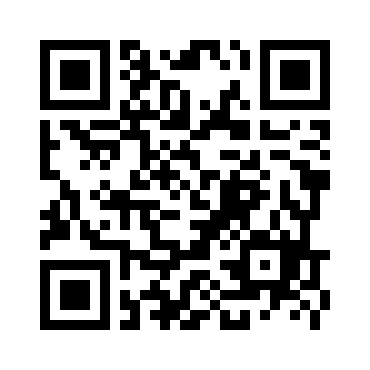